In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy.signal import get_window
import time

#dBu = 20log10(V/0.775V)
#The FFT assumes that the signal is periodic and continuous within the window. 
#If the signal is not perfectly periodic, it can cause spectral leakage, which results in an offset or differences in the frequency spectrum.
def rfft_plot(x, f_s, freqs):
    window = get_window("hanning", len(x))
    x_windowed = x * window
    N = len(x)
    print(f"N = {N}")

    X = fft.rfft(x_windowed)
    X_normalized = np.abs(X) / N
    X_dBu = 20*(np.log10(np.abs(X_normalized))/ 0.775)
    
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, X_dBu)
    plt.title('Frequency spectrum')
    plt.xlabel('Frequency in Hertz [Hz]')
    plt.ylabel('Frequency Domain Magnitude [dBu]')
    plt.xlim(-20 , f_s /2 + 20)
    plt.grid(True)
    plt.show()
    
    return X

In [3]:
df = pd.read_csv('wf/wf_17.23_25072024_01.csv')
data = df.to_numpy()
print(data[:1])
data = data[1:]
print(data)


[['(ms)' '(V)']]
[['0.00000000' '0.00000000']
 ['0.00100480' '0.00000000']
 ['0.00200960' '0.00000000']
 ...
 ['100.00070736' '-0.00787402']
 ['100.00171216' '0.00787402']
 ['100.00271696' '0.01574803']]


In [4]:
data_float = data.astype(float)
times = data_float[1:, 0]
print(f"Times: {times}")

amplitudes = data_float[1:, 1]
print(f"Amplitudes: {amplitudes}")

Times: [1.00480000e-03 2.00960000e-03 3.01440000e-03 ... 1.00000707e+02
 1.00001712e+02 1.00002717e+02]
Amplitudes: [ 0.          0.         -0.00787402 ... -0.00787402  0.00787402
  0.01574803]


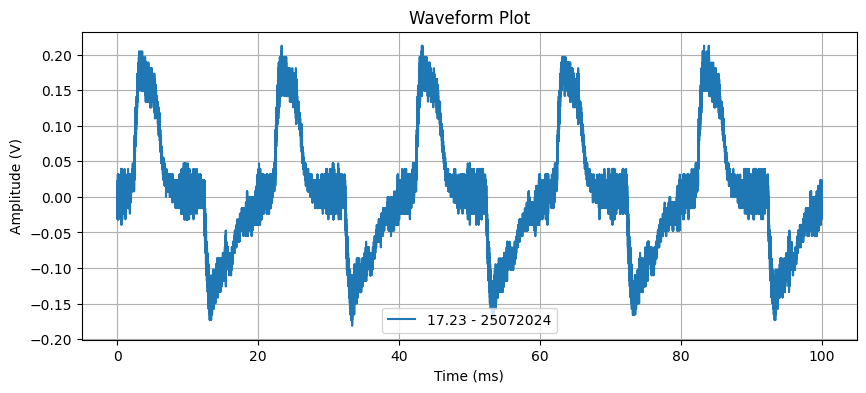

In [175]:
plt.figure(figsize=(10, 4))
plt.plot(times, amplitudes, label='17.23 - 25072024')
plt.title('Waveform Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

f_ s = 995.2229601902608
N = 99525


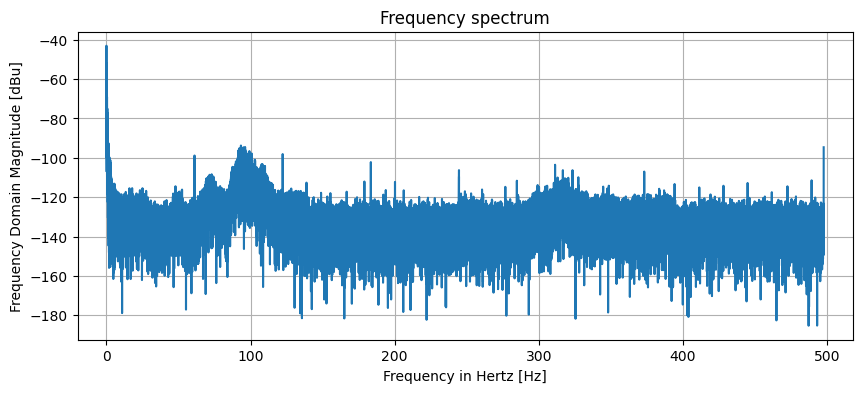

Execution time: 0.367999792098999 seconds


In [176]:
span = times[len(times)-1] 
f_s = len(times) / span
print(f"f_ s = {f_s}")
freqs = fft.rfftfreq(len(amplitudes), 1/f_s)#window lenght, sample spacing
#plot the fft and see how much time it takes
start_time = time.time()

A = rfft_plot(amplitudes, f_s, freqs)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

# Comaprison with GUI spectrum



In [177]:
df = pd.read_csv('fft/fft_17.23_25072024_01.csv')
spe = df.to_numpy()
print(spe[:1])
spe = spe[1:]
print(spe)

[['(kHz)' '(dBu)']]
[['0.00000000' '-30.89983000']
 ['0.03037179' '-22.86273000']
 ['0.06074359' '-21.16098000']
 ...
 ['497.52035337' '-80.54145000']
 ['497.55072516' '-78.29919000']
 ['497.58109696' '-64.37499000']]


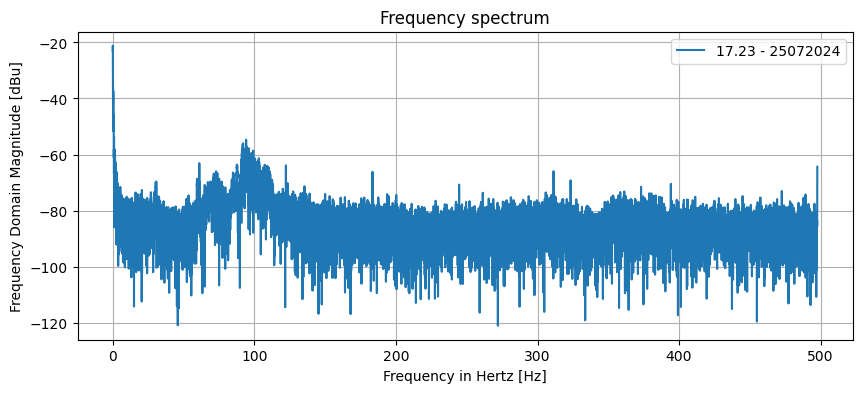

In [178]:
spe_float = spe.astype(float)
frequences = spe_float[1:, 0]

magnitudes = spe_float[1:, 1]

plt.figure(figsize=(10, 4))
plt.plot(frequences, magnitudes, label='17.23 - 25072024')
plt.title('Frequency spectrum')
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain Magnitude [dBu]')
plt.legend()
plt.grid(True)
plt.show()